# architecture-06 ( copy from 04 )

What's new:

1- Remove correlated indicators.

You can remove dependencies greater than 85%.

In [18]:
import pandas as pd
import talib

In [19]:
df = pd.read_csv('datasets-06/XAGUSD-H1-rates.csv', sep='\t').dropna()

In [20]:
# Feature Engineering (TA-Lib indicators)
def add_ta_features(df):
    df['rsi'] = talib.RSI(df['<CLOSE>'], timeperiod=14)
    df['macd'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(df['<CLOSE>'])
    df['ema_10'] = talib.EMA(df['<CLOSE>'], timeperiod=10)
    df['ema_50'] = talib.EMA(df['<CLOSE>'], timeperiod=50)
    df['atr'] = talib.ATR(df['<HIGH>'], df['<LOW>'], df['<CLOSE>'], timeperiod=14)
    df['adx'] = talib.ADX(df['<HIGH>'], df['<LOW>'], df['<CLOSE>'], timeperiod=14)
    df = df.dropna()
    return df


df = add_ta_features(df)

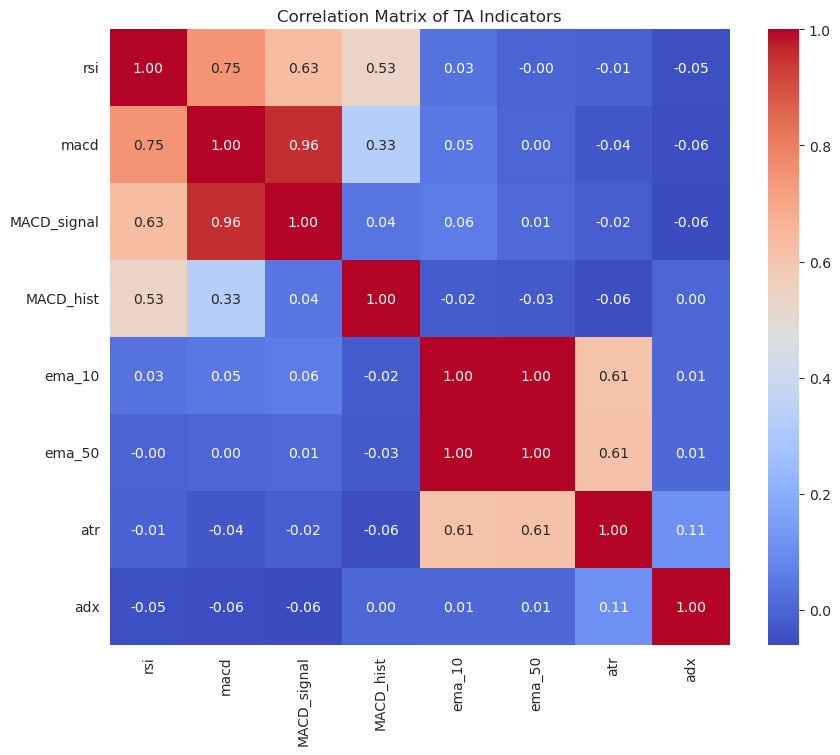

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
# Just technical indicators, not price columns
indicators = df[['rsi', 'macd', 'MACD_signal', 'MACD_hist', 'ema_10', 'ema_50', 'atr', 'adx']]
corr_matrix = indicators.corr()

# Visualize
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of TA Indicators")
plt.show()

In [22]:
# Feature Engineering (TA-Lib indicators)
def add_ta_features(df):
    df['rsi'] = talib.RSI(df['<CLOSE>'], timeperiod=14)
    df['macd'], _, df['MACD_hist'] = talib.MACD(df['<CLOSE>'])
    df['ema_50'] = talib.EMA(df['<CLOSE>'], timeperiod=50)
    df['atr'] = talib.ATR(df['<HIGH>'], df['<LOW>'], df['<CLOSE>'], timeperiod=14)
    df['adx'] = talib.ADX(df['<HIGH>'], df['<LOW>'], df['<CLOSE>'], timeperiod=14)
    df = df.dropna()
    return df


df = add_ta_features(df)

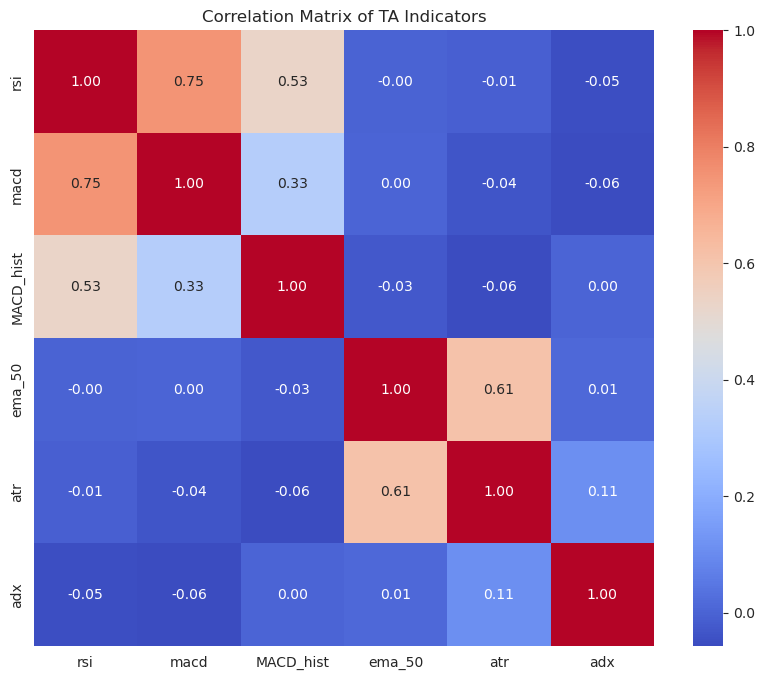

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Just technical indicators, not price columns
indicators = df[['rsi', 'macd', 'MACD_hist', 'ema_50', 'atr', 'adx']]
corr_matrix = indicators.corr()

# Visualize
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of TA Indicators")
plt.show()